In [30]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [52]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [53]:
model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [33]:
# изменение формы тензора
train_images = train_images.reshape((60000, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
train_images = train_images.astype('float32') / 255

# изменение формы тензора
test_images = test_images.reshape((10000, 28 * 28))

# Задаем тип данным и нормируем на максимальное значение в тензоре (приводим к диапазону [0, 1])
test_images = test_images.astype('float32') / 255

In [34]:
import numpy as np
def to_one_hot(labels, dimension=10): # dimension - число классов
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [41]:
import keras

In [35]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, 10) # Кодируем обучающие метки на 10 классов
test_labels = to_categorical(test_labels, 10)   # Кодируем тестовые метки на 10 классов

In [54]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        mode='min',
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='model-best.keras',
        monitor='val_loss',
        save_best_only=True
    )
]
history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=10, batch_size=128,
    callbacks=callbacks
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9295 - loss: 0.2305 - val_accuracy: 0.9623 - val_loss: 0.1201 - learning_rate: 0.0010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9740 - loss: 0.0830 - val_accuracy: 0.9768 - val_loss: 0.0765 - learning_rate: 0.0010
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9837 - loss: 0.0535 - val_accuracy: 0.9766 - val_loss: 0.0727 - learning_rate: 0.0010
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9884 - loss: 0.0376 - val_accuracy: 0.9786 - val_loss: 0.0681 - learning_rate: 0.0010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9913 - loss: 0.0272 - val_accuracy: 0.9784 - val_loss: 0.0738 - learning_rate: 0.0010
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9937 - loss: 0.0197 - val_accuracy: 0.9799 - val_loss: 0.0762 - learning_rate: 0.0010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9957 - loss: 0.0143 -

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точность на тестовом образцу:', test_acc)
print('Потери на тестовом образце:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9858 - loss: 0.0658
Точность на тестовом образцу: 0.98580002784729
Потери на тестовом образце: 0.0658261701464653


In [12]:
# Выбор нужной картинки из тестовой выборки
n = 23
x = test_images[n]

# Проверка формы данных
print(x.shape)

(784,)


In [13]:
import numpy as np

# Массив из одного примера, так как нейронка принимает именно массивы примеров (батчи) для распознавания
x = np.expand_dims(x, axis=0)

# Проверка формы данных
print(x.shape)

(1, 784)


In [14]:
# Предсказываем выбранную картинку
prediction = model.predict(x)

# Вывод результата - вектор из 10 чисел
print(f'Вектор результата на 10 выходных нейронах: {prediction}')

# Получение и вывод индекса самого большого элемента (это значение цифры, которую распознала сеть)
pred = np.argmax(prediction)
print(f'Распознана цифра: {pred}')
print(f'Правильное значение: {np.argmax(test_labels[n])}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
Вектор результата на 10 выходных нейронах: [[1.4859446e-10 1.0596764e-10 1.7204452e-09 1.2453147e-06 1.1906009e-11
  9.9999857e-01 1.4916688e-07 2.3563378e-13 8.2709768e-09 1.6660799e-08]]
Распознана цифра: 5
Правильное значение: 5


In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

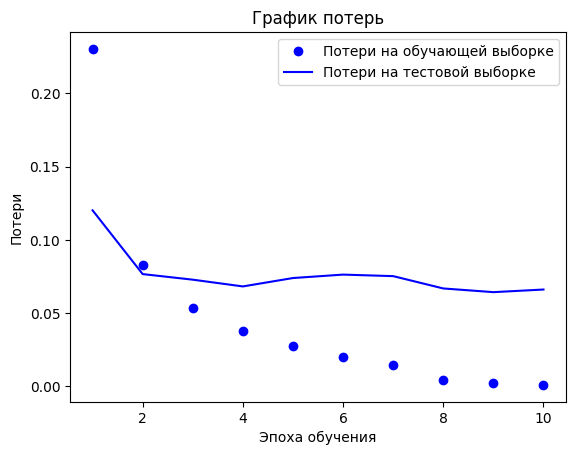

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Потери на обучающей выборке')
plt.plot(epochs, val_loss_values, 'b', label='Потери на тестовой выборке')
plt.title('График потерь')
plt.xlabel('Эпоха обучения')
plt.ylabel('Потери')
plt.legend()
plt.show()

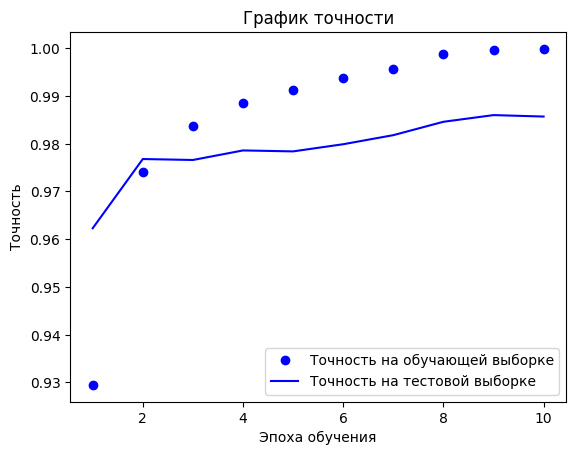

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc_values, 'b', label='Точность на тестовой выборке')
plt.title('График точности')
plt.xlabel('Эпоха обучения')
plt.ylabel('Точность')
plt.legend()
plt.show()